<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Crypto_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crypto EDA and app


In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
#for importing data(kaggle)
import os
import opendatasets as od

#for stats and data cleaning
import pandas as pd
import numpy as np
import datetime

#for data viz 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
#sns.set(color_codes=True)

# we will use plotly to build many interactives plots 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import plotly.graph_objs as go
from plotly.offline import iplot

# filter warning output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory"
od.download(path)

Skipping, found downloaded files in "./cryptocurrencypricehistory" (use force=True to force download)


In [ ]:
path_c= "./cryptocurrencypricehistory"
os.listdir(path_c)


['coin_Cardano.csv',
 'coin_USDCoin.csv',
 'coin_NEM.csv',
 'coin_Stellar.csv',
 'coin_Litecoin.csv',
 'coin_Tron.csv',
 'coin_Cosmos.csv',
 'coin_XRP.csv',
 'coin_Iota.csv',
 'coin_Polkadot.csv',
 'coin_Ethereum.csv',
 'coin_Aave.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_CryptocomCoin.csv',
 'coin_Bitcoin.csv',
 'coin_ChainLink.csv',
 'coin_BinanceCoin.csv',
 'coin_Solana.csv',
 'coin_Uniswap.csv',
 'coin_Monero.csv',
 'coin_WrappedBitcoin.csv',
 'coin_Tether.csv']

##Reporting each crypto currency 

In [ ]:
# Read the file 
data=pd.read_csv(path_c+"/coin_Aave.csv")
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09
274,275,Aave,AAVE,2021-07-06 23:59:59,346.714780,307.997525,307.997525,316.898507,9.887055e+08,4.066776e+09


##Data cleaning 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        275 non-null    int64  
 1   Name       275 non-null    object 
 2   Symbol     275 non-null    object 
 3   Date       275 non-null    object 
 4   High       275 non-null    float64
 5   Low        275 non-null    float64
 6   Open       275 non-null    float64
 7   Close      275 non-null    float64
 8   Volume     275 non-null    float64
 9   Marketcap  275 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


In [ ]:
#duplicate rows 
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape[0])
if duplicate_rows_data.shape[0] !=0:
  print(duplicate_rows_data)

number of duplicate rows:  0


In [ ]:
#Missing values 
print(data.isnull().sum())

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [ ]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09
274,275,Aave,AAVE,2021-07-06 23:59:59,346.714780,307.997525,307.997525,316.898507,9.887055e+08,4.066776e+09


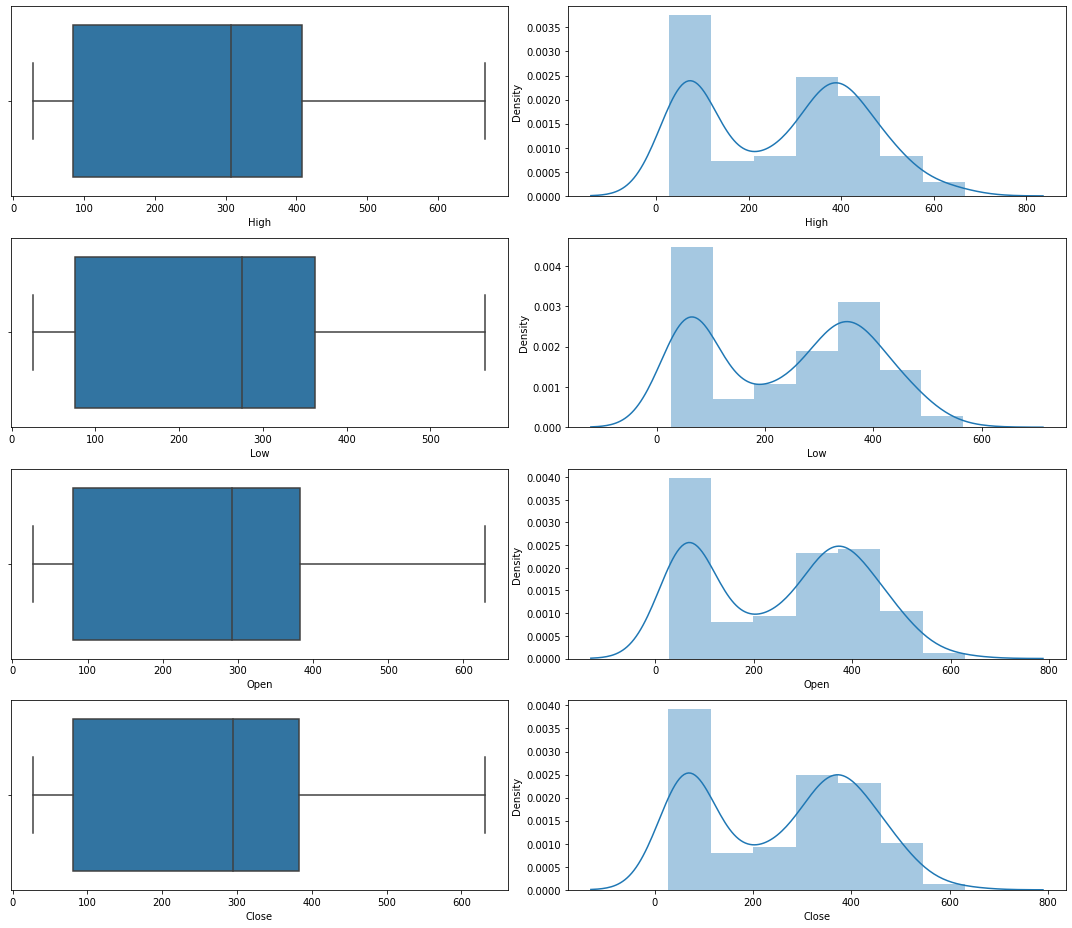

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= data["High"], ax = ax[0,0])
sns.distplot(data['High'], ax = ax[0,1])
sns.boxplot(x= data["Low"], ax = ax[1,0])
sns.distplot(data['Low'], ax = ax[1,1])
sns.boxplot(x= data["Open"], ax = ax[2,0])   			 
sns.distplot(data['Open'], ax = ax[2,1])
sns.boxplot(x= data["Close"], ax = ax[3,0])
sns.distplot(data['Close'], ax = ax[3,1])

plt.tight_layout()

##Analysis AAVE

In [ ]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

In [ ]:
data.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [ ]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [ ]:
data['Date'] = data['Date'].dt.date
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
#Volume over time 
fig=px.line(data,x=data.groupby('Date')['Volume'].sum().index,
            y=data.groupby('Date')['Volume'].sum(),
            template="plotly_dark",
            labels=dict(x="Date", y="Volume (USD)"))

fig.update_layout(title={'text':"<b>{} volume over time</b>".format(data["Name"][0]),'xanchor':'left'})
fig.show()

In [ ]:
#Marketcap over time 
fig=px.line(data,x=data.groupby('Date')['Marketcap'].sum().index,
            y=data.groupby('Date')['Marketcap'].sum(),
            template="plotly_dark",
            labels=dict(x="Date", y="Marketcap (USD)"))
fig.update_layout(title={'text':"<b>{} Marketcap over time</b>".format(data["Name"][0]),'xanchor':'left'} )
fig.show()

In [ ]:
#Candlestick chart
fig = go.Figure(data=[go.Candlestick(x= data['Date'],
                       open  = data['Open'],
                       high  = data['High'],
                       low   = data['Low'],
                       close = data['Close']
                                )])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title='<b>{} candlestick chart </b>'.format(data["Name"][0]), 
                  yaxis_title='to USD($)',
                  template="plotly_dark")
fig.show()

In [ ]:
from plotly.subplots import make_subplots

##Automate the process of visualizations

In [ ]:
def coin_visualization(file_name):
  
  #read data 
  data = pd.read_csv(path_c+"/"+file_name)
  
  #preprocess 
  #convert date to datetime object 
  data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
  #extract date 
  data['Date'] = data['Date'].dt.date

  #make amazing plot !
  #sublot with custom title 
  fig = make_subplots(rows=3, cols=1,subplot_titles=("<b>{} volume over time</b>".format(data["Name"][0]),
                                       "<b>{} Marketcup over time</b>".format(data["Name"][0]),
                                      "<b>{} candlestick chart </b>".format(data["Name"][0])))
  
  #add plot
  fig.add_trace(
        go.Scatter(x=data.groupby('Date')['Volume'].sum().index,
                   y=data.groupby('Date')['Volume'].sum()) ,
        row=1, col=1
    )

  fig.add_trace(
        go.Scatter(x=data.groupby('Date')['Marketcap'].sum().index,
                   y=data.groupby('Date')['Marketcap'].sum() ), 
        row=2, col=1
    )
  
  fig.add_trace(
        go.Candlestick(x= data['Date'],
                       open  = data['Open'],
                       high  = data['High'],
                       low   = data['Low'],
                       close = data['Close']
                                ),
        row=3, col=1
    )
  fig.update_layout(height=1400, width=1200, 
                    title_text="<b>{} Evolution</b>".format(data["Name"][0]),
                    template="plotly_dark", showlegend=False)
 
  fig.show()

In [ ]:
coin_visualization("coin_Bitcoin.csv")

##ALL Coin 

In [ ]:
#read all data in a single table 
path_c= "./cryptocurrencypricehistory"
os.listdir(path_c)

['coin_Cardano.csv',
 'coin_USDCoin.csv',
 'coin_NEM.csv',
 'coin_Stellar.csv',
 'coin_Litecoin.csv',
 'coin_Tron.csv',
 'coin_Cosmos.csv',
 'coin_XRP.csv',
 'coin_Iota.csv',
 'coin_Polkadot.csv',
 'coin_Ethereum.csv',
 'coin_Aave.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_CryptocomCoin.csv',
 'coin_Bitcoin.csv',
 'coin_ChainLink.csv',
 'coin_BinanceCoin.csv',
 'coin_Solana.csv',
 'coin_Uniswap.csv',
 'coin_Monero.csv',
 'coin_WrappedBitcoin.csv',
 'coin_Tether.csv']

In [ ]:
data = pd.read_csv(path_c+"/coin_Ethereum.csv")

In [ ]:
#combine all data 
for i in os.listdir(path_c)[1:] :
  data = pd.concat([data, pd.read_csv(path_c+"/"+i)],ignore_index=True)

In [ ]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
37863,2314,Tether,USDT,2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10
37864,2315,Tether,USDT,2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10
37865,2316,Tether,USDT,2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10
37866,2317,Tether,USDT,2021-07-05 23:59:59,1.001040,0.999426,0.999426,1.000667,4.721585e+10,6.241550e+10
37867,2318,Tether,USDT,2021-07-06 23:59:59,1.000879,0.999825,1.000728,1.000090,5.105419e+10,6.233384e+10


In [ ]:
#marketcap over time 
#Volume over time 
fig=px.bar(data,x=data.groupby(['Name'])['Marketcap'].sum().index,
            y=data.groupby(['Name'])['Marketcap'].sum(),
            template="plotly_dark",
           labels=dict(x="Date", y="Volume (USD)"),
           color=data.groupby('Name')['Marketcap'].sum().index)
fig.update_layout(title={'text':"<b>Crypto marketcap</b>",'xanchor':'left'})
fig.show()

In [ ]:

#Volume over time 
fig=px.bar(data,x=data.groupby(['Name'])['Volume'].sum().index,
           y=data.groupby(['Name'])['Volume'].sum(),
           template="plotly_dark", 
           color=data.groupby('Name')['Volume'].sum().index ,
           labels=dict(x="Date", y="Volume (USD)"))

fig.update_layout(title={'text':"<b>Crypto volume of transactions</b>",'xanchor':'left'})
fig.show()

In [ ]:
# crypto marketcap evolution /year 
df = data.groupby(['Name','Date'])['Marketcap'].mean().to_frame(name ='Marketcap').reset_index() 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

def evolution_by_year(year):
  
  fig=px.line(df[df['Date'].dt.year == year] , x='Date',
              y='Marketcap', 
              color = 'Name',
              title="<b>Crypto Evolution by year</b>",template="plotly_dark")
  fig.show()

In [ ]:
evolution_by_year(2018)

In [ ]:
# crypto marketcap evolution /year with treemap
fig=px.treemap(df[df['Date'].dt.year == 2021] ,
               values='Marketcap', 
               path=['Name'],
               template="plotly_dark",
               title="<b>TreeMap representation of Crypto markercap in 2021</b>")
fig.show()

In [ ]:
# crypto price evolution /year 
df1 = data.groupby(['Name','Date'])['Close'].mean().to_frame(name ='Price').reset_index() 
df1['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

def evolution_of_price_by_year(year):
  
  fig=px.line(df1[df1['Date'].dt.year == year] , x='Date',
              y='Price', 
              color = 'Name',
              title="<b>Prices by year</b>",template="plotly_dark")
  fig.show()

In [ ]:
evolution_of_price_by_year(2017)

In [ ]:
#evolution of prices without Bitcoin 
def evolution_of_price_by_year_without_Bitcoin(year):
  
  fig=px.line(df1[(df1['Date'].dt.year == year) & (df1['Name'] != 'Bitcoin')], x='Date',
              y='Price', 
              color = 'Name',
              title="<b>Prices by year</b>",template="plotly_dark")
  fig.show()

In [ ]:
evolution_of_price_by_year_without_Bitcoin(2018)

In [ ]:
#End.